In [7]:
#Logistic Regression to find if the patient might have daibetes.


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pi=pd.read_csv("C:/Users/Curly Shaan/Desktop/Data Analysis/diabetes.csv")


In [8]:
pi.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
pi.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


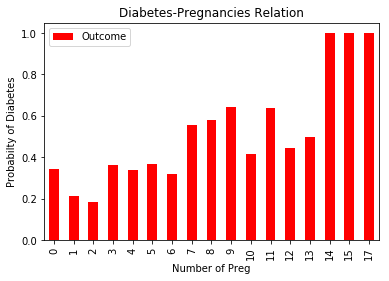

In [10]:
bmi_ratio=pi.pivot_table(index="Pregnancies", values="Outcome")
bmi_ratio.plot.bar(color='Red')
plt.title('Diabetes-Pregnancies Relation')
plt.xlabel('Number of Preg')
plt.ylabel('Probabilty of Diabetes')
plt.show()

In [12]:
pi.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


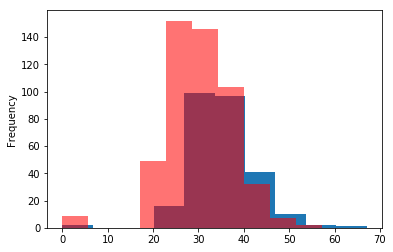

In [13]:
bmi1=pi[pi["Outcome"]==1]
bmi2=pi[pi["Outcome"]==0]
bmi1['BMI'].plot.hist()
bmi2['BMI'].plot.hist(color='red', alpha=0.55)

In [14]:
a=pi.BMI.unique()
a.sort()

In [15]:
def bmi_range(pi,cuts,labelss):
    pi['range']=pd.cut(pi['BMI'],cuts,labels=labelss)
    return pi
cuts=[-0.5,18.1,25,32,36,45,68]
labelss=['Error','Underweight','Ideal','OverWeight','Super Heavy', 'Too much heavy']
pi=bmi_range(pi,cuts,labelss)


Ideal             263
OverWeight        176
Super Heavy       171
Underweight       112
Too much heavy     35
Error              11
Name: range, dtype: int64


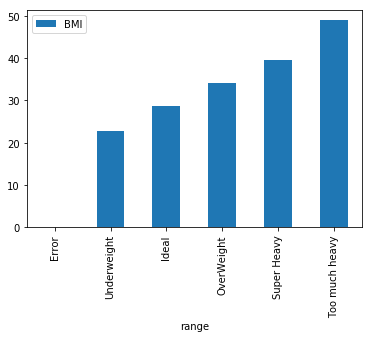

In [16]:
a3=pi['range'].value_counts()
print(a3)
a2=pi.pivot_table(index='range', values='BMI')
a2.plot.bar()

In [17]:
print(pi.groupby('range').mean())

                Pregnancies     Glucose  BloodPressure  SkinThickness  \
range                                                                   
Error              3.909091  104.272727      28.818182       4.181818   
Underweight        3.187500  106.669643      64.303571      10.455357   
Ideal              3.901141  119.155894      67.889734      17.117871   
OverWeight         4.335227  124.653409      70.556818      23.579545   
Super Heavy        3.783626  127.964912      72.842105      27.959064   
Too much heavy     3.342857  131.257143      80.714286      32.057143   

                   Insulin        BMI  DiabetesPedigreeFunction        Age  \
range                                                                        
Error             8.090909   0.000000                  0.433273  30.454545   
Underweight      41.875000  22.726786                  0.404107  31.669643   
Ideal            71.684411  28.746768                  0.456217  33.015209   
OverWeight       83.29545

In [18]:
pi['range'].value_counts()

Ideal             263
OverWeight        176
Super Heavy       171
Underweight       112
Too much heavy     35
Error              11
Name: range, dtype: int64

In [19]:
pi.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,range
0,6,148,72,35,0,33.6,0.627,50,1,OverWeight
1,1,85,66,29,0,26.6,0.351,31,0,Ideal
2,8,183,64,0,0,23.3,0.672,32,1,Underweight
3,1,89,66,23,94,28.1,0.167,21,0,Ideal
4,0,137,40,35,168,43.1,2.288,33,1,Super Heavy


In [20]:
corre=pi.corr()
corre['Outcome'].sort_values(ascending=True)

BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
DiabetesPedigreeFunction    0.173844
Pregnancies                 0.221898
Age                         0.238356
BMI                         0.292695
Glucose                     0.466581
Outcome                     1.000000
Name: Outcome, dtype: float64

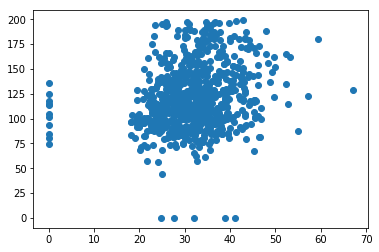

In [21]:
plt.scatter(pi['BMI'],pi['Glucose'])

In [22]:
pi['BMI'].replace(np.NaN, 0, inplace=True)
pi['Glucose'].replace(np.NaN, 0, inplace=True)

pi['Insulin'].replace(np.NaN, 0, inplace=True)

In [23]:
pi.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,range
0,6,148,72,35,0,33.6,0.627,50,1,OverWeight
1,1,85,66,29,0,26.6,0.351,31,0,Ideal
2,8,183,64,0,0,23.3,0.672,32,1,Underweight
3,1,89,66,23,94,28.1,0.167,21,0,Ideal
4,0,137,40,35,168,43.1,2.288,33,1,Super Heavy


In [24]:
pi.apply(lambda x: sum(x.isnull()))

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
range                       0
dtype: int64

In [25]:
pi.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [26]:
pi.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,range
0,6,148,72,35,0,33.6,0.627,50,1,OverWeight
1,1,85,66,29,0,26.6,0.351,31,0,Ideal
2,8,183,64,0,0,23.3,0.672,32,1,Underweight
3,1,89,66,23,94,28.1,0.167,21,0,Ideal
4,0,137,40,35,168,43.1,2.288,33,1,Super Heavy


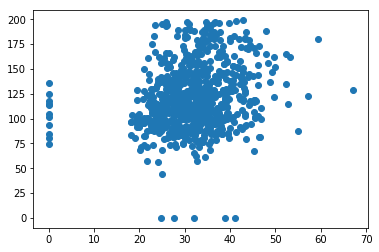

In [27]:
plt.scatter(pi['BMI'],pi['Glucose'])

In [28]:
corre=pi.corr()
corre['Outcome'].sort_values(ascending=True)

BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
DiabetesPedigreeFunction    0.173844
Pregnancies                 0.221898
Age                         0.238356
BMI                         0.292695
Glucose                     0.466581
Outcome                     1.000000
Name: Outcome, dtype: float64

In [29]:
pi.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
range                       False
dtype: bool

In [30]:
X=pi[['Glucose','BMI']].values
Y=pi[['Outcome']].values

In [31]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

#Standard Scalar is a beautiful library for analysis

In [32]:
print(X[0:10,:])

[[ 0.84832379  0.20401277]
 [-1.12339636 -0.68442195]
 [ 1.94372388 -1.10325546]
 [-0.99820778 -0.49404308]
 [ 0.5040552   1.4097456 ]
 [-0.15318486 -0.81134119]
 [-1.34247638 -0.12597727]
 [-0.184482    0.41977549]
 [ 2.38188392 -0.18943689]
 [ 0.12848945 -4.06047387]]


In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [43]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

model.fit(X_train, y_train.ravel())
y_pred = model.predict(X_test)

In [44]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[95 12]
 [21 26]]


In [45]:
def precision_recall(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)    
    tp = cm[0,0]
    fp = cm[0,1]
    fn = cm[1,0]
    prec = tp / (tp+fp)
    rec = tp / (tp+fn)    
    return prec, rec

precision, recall = precision_recall(y_test, y_pred)
print('Precision: %f Recall %f' % (precision, recall))

Precision: 0.887850 Recall 0.818966


In [46]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.7857142857142857


In [47]:
from sklearn.model_selection import cross_val_score

model = LogisticRegression()
scores = cross_val_score(model, X, Y.ravel(), cv=10)
scores.sort()
accuracy = scores.mean()

print(scores)
print(accuracy)

[0.71428571 0.73684211 0.75324675 0.75324675 0.75324675 0.76315789
 0.76623377 0.76623377 0.79220779 0.79220779]
0.759090909090909


In [49]:
from sklearn.metrics import classification_report
print (classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.82      0.89      0.85       107
          1       0.68      0.55      0.61        47

avg / total       0.78      0.79      0.78       154

